In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
# Ici on affiche les infos statistique de notre jeu de données
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

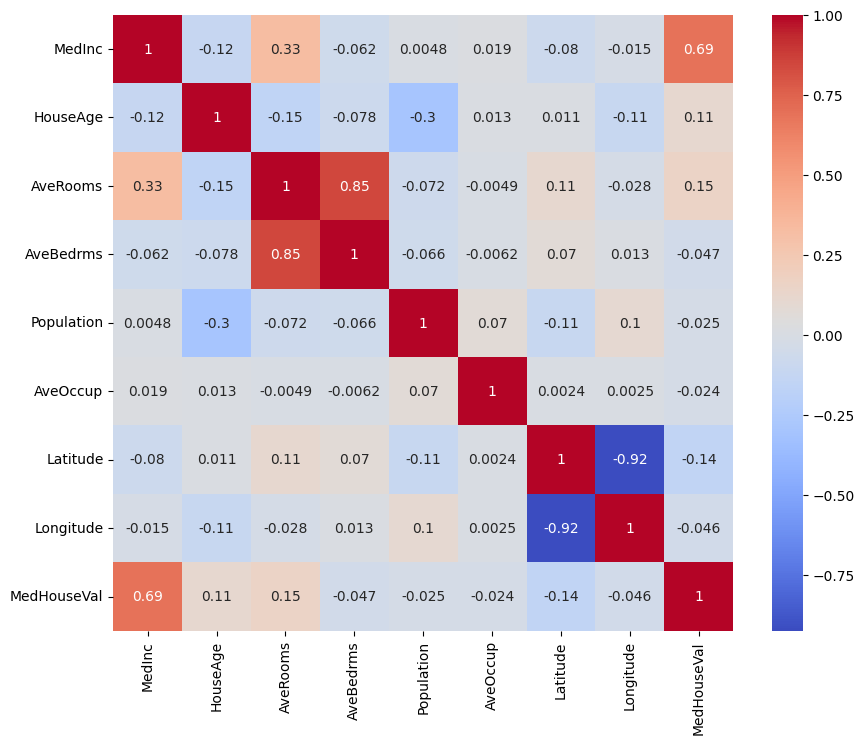

In [6]:
# Visualisation des corrélations entre les différents attributs de notre dataframe 
# afin de trouver les attributs clés et les attributs les moins determinants
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# on enleve la colonne a prédire celle des prix, qu'on utilisera comme validation (Y= les sorties et X=les entrées)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import joblib
import os

# Créer le dossier 'models' s'il n'existe pas
os.makedirs("../models", exist_ok=True)

# Sauvegarder le scaler (important pour la phase API)
joblib.dump(scaler, "../models/scaler.pkl")

# Sauvegarder aussi les ensembles de données transformées et cibles
joblib.dump(X_train_scaled, "../models/X_train_scaled.pkl")
joblib.dump(X_test_scaled, "../models/X_test_scaled.pkl")
joblib.dump(y_train, "../models/y_train.pkl")
joblib.dump(y_test, "../models/y_test.pkl")

print("✅ Données et scaler sauvegardés dans le dossier 'models/'")


✅ Données et scaler sauvegardés dans le dossier 'models/'
